# Study of ads for the sale of apartments

At your disposal is the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your job is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

### Open the data file and study the general information.

#### Import data into dataset ####

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### Examining general information about received data ####

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Stroim histogram ####

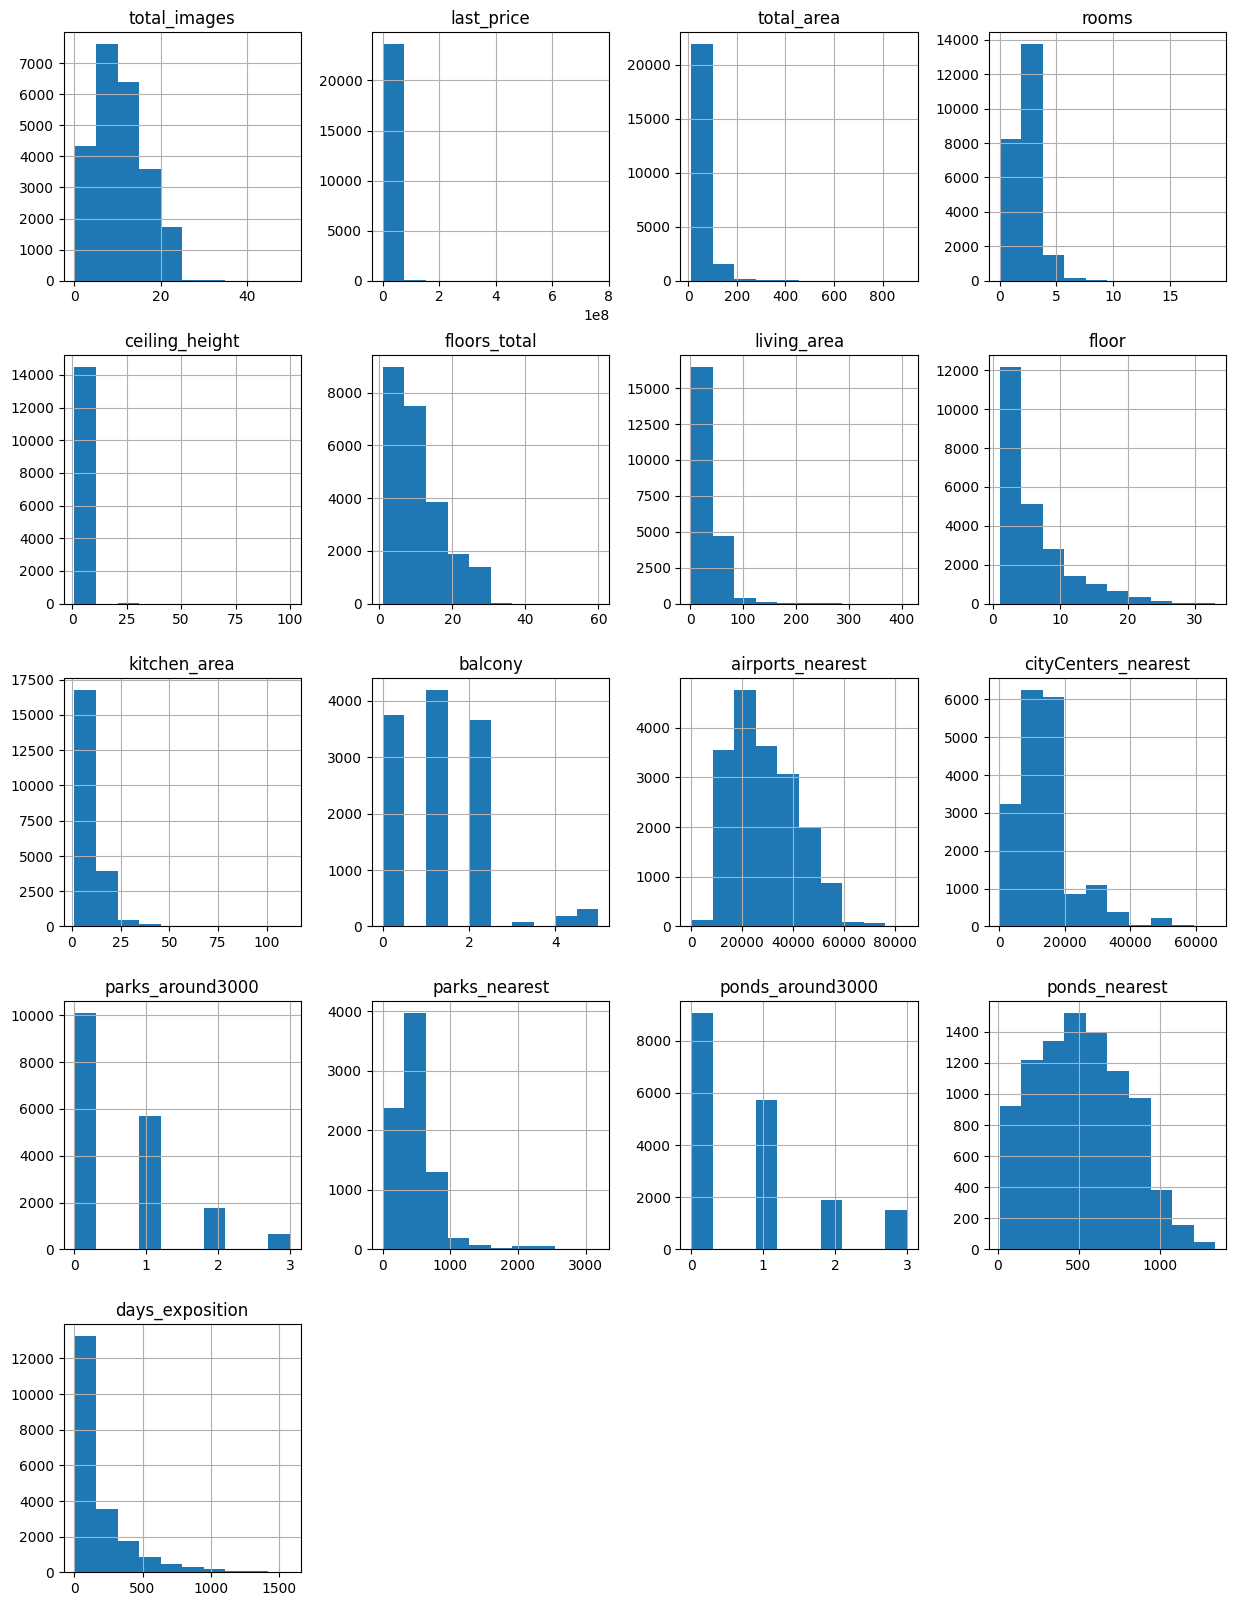

In [4]:
data.hist(figsize=(15, 20));

### Data preprocessing

Rename columns according to 'best practices':

In [5]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

#### Missing values ​​####

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

***Description of missing values***\
Number of detected `Null` out of `23699`:
- `9195` `ceiling_height` - ceiling height is missing in almost a third of ads, leave `Null`.
- `86` `floors_total` - the data was simply not filled in, from the selection, leave `Null`.
- `1903` `living_area` - leave `Null`.
- `2775` `is_apartment` - values, we can assume that this is not an apartment and assign `False`.
- `2278` `kitchen_area` - check if this is a studio? If not, then leave `Null`.
- `11519` `balcony` - most likely there are no balconies, fill in `0`
- `49` `locality_name` - the data was simply not filled in, leave `Null`


- `5542` `airports_nearest` - there are no airports nearby, leave `Null`
- `5519` `city_centers_nearest` - city center is not close, leave `Null`
- `5518` `parks_around3000` - means there are no parks within a radius of 3 km, leave `Null`
- `15620` `parks_nearest` - means there are no parks, leave `Null`
- `5518` `ponds_around3000` - means there are no ponds within a radius of 3 km, leave `Null`
- `14589` `ponds_nearest` - keep `Null`
- `3181` `days_exposition` - ad has not been published, leave `Null`

In [7]:
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

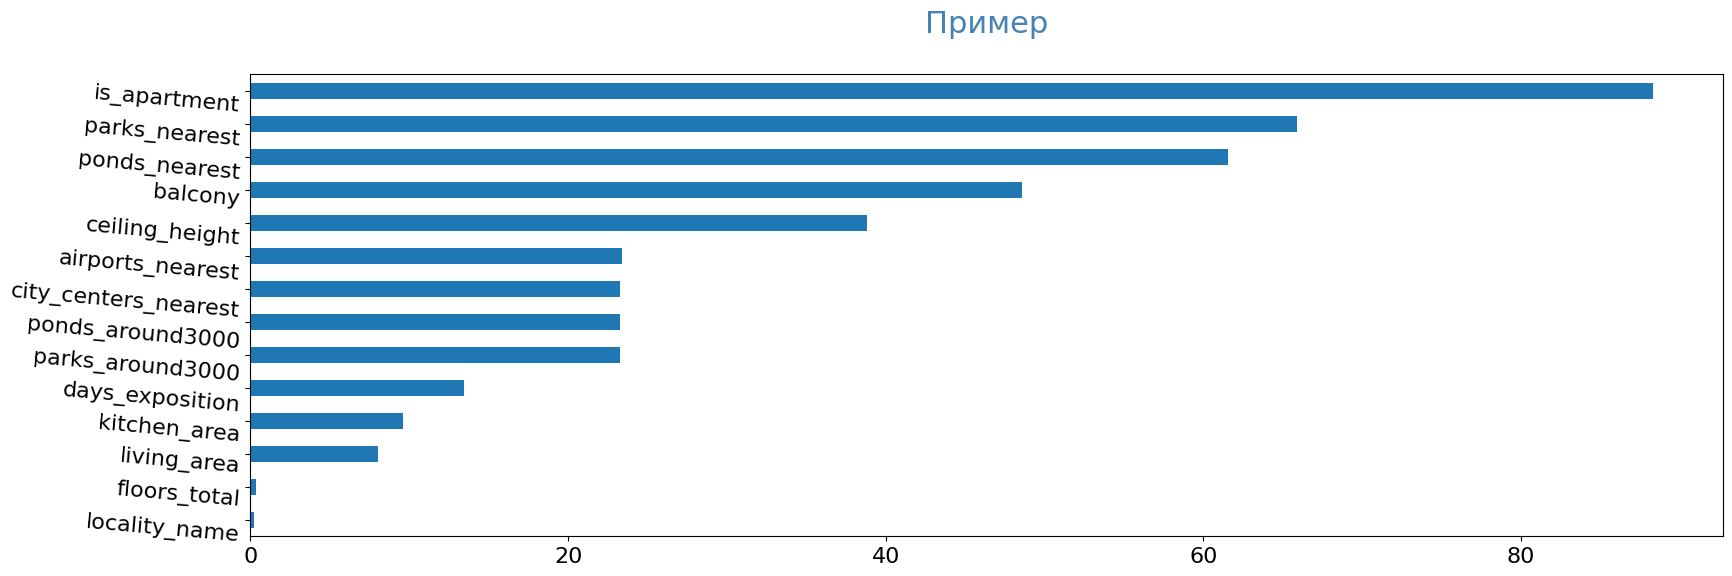

In [8]:
pass_value_barh(data)

Fill Null apartments as 'False'

In [9]:
data['is_apartment'] = data['is_apartment'].fillna('False')

Fill Null balconies as '0'

In [10]:
data['balcony'] = data['balcony'].fillna(0)

Udalem stroki with Null locality_name

In [11]:
data['locality_name'].dropna(inplace=True)

Delete lines with Null floors_total

In [12]:
data['floors_total'].dropna(inplace=True)

#### Data types ####

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Change data type for:
- last_price - int64
- first_day_exposition - date
- floors_total - Int8 **nullable-integer extension dtype**
- is apartment - book
- balcony - int8
- days_exposition - int64

Changing the `first_day_exposition` type is necessary to make it convenient to work with the date in the future.\
Changing the type of `is_apartment` is necessary to work with the boolean value and save memory.

Changing types in all other cases is necessary to save memory.

Used try to catch type conversion errors

In [14]:
try:
    data['last_price'] = data['last_price'].astype('int64')
    print('1ok')
except:
    print('last_price int type conversion fail')
    
try:    
    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
    print('2ok')
except:
    print('first_day_exposition to_datetime type conversion fail')
    
try:
    data['floors_total'] =  data['floors_total'].astype('Int8')
    print('3ok')
except:
    print('floors_total int8 type conversion fail')
      
try:
    data['is_apartment'] = data['is_apartment'].map({'False':False, 'True':True})
    print('4ok')
except:
    print('is_apartment bool type conversion fail')
        
try:
    data['balcony'] = data['balcony'].astype('int8')
    print('5ok')
except:
    print('balcony int8 type conversion fail')
    
try:
    data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')
    print('6ok')
except:
    print('days_exposition int64 type conversion fail')

1ok
2ok
3ok
4ok
5ok
6ok


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int8          
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          20924 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Examining unique values ​​####

In [16]:
def loc_length():
    return print('Количество уникальных занчений locality_name:', data['locality_name'].unique().shape[0])
loc_length()

Количество уникальных занчений locality_name: 365


**Thinking about removing duplicates**

1. Lowercase Everything

2. Replace all "ё" with "e"

3. Replace "urban settlement" with "urban-type settlement"

4. Check for Explicit Duplicates

converting everything to lowercase just in case

In [17]:
data['locality_name'] = data['locality_name'].str.lower()

replace all "ё" with "e"

In [18]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
print('Заменяем все "ё" на "е"')
loc_length()
print()

Заменяем все "ё" на "е"
Количество уникальных занчений locality_name: 331



replace "urban settlement" with "urban-type settlement"

In [19]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
print('Заменяем "городской поселок" на "поселок городского типа"')
loc_length()
print()

Заменяем "городской поселок" на "поселок городского типа"
Количество уникальных занчений locality_name: 324



Check for obvious duplicates

In [20]:
print('Количетво явных дубликатов:', data.duplicated().sum())

Количетво явных дубликатов: 0


Starting from here I believed the assignment that quote: 'implicit duplicates. For example, "village of Ryabovo" and "urban-type settlement of Ryabovo'
But they are not duplicates, these are two different settlements, this can be checked on Yandex.Maps.
Therefore, all the code below is commented out and not used.

In [21]:
# locality_township = []

# for x in data['locality_name'].unique():
#     try:
#         if 'городского типа' in x:
#             locality_township.append(x)
#     except:
#         print('Ошибка в цикле из-за значения:', x)

Series for unique values.

In [22]:
# unique_locality = pd.Series(data['locality_name'].unique())

convert to DataFrame to read the number of occurrences of the name of urban-type settlements in the unique_locality dataframe

In [23]:
# locality_df = pd.DataFrame(locality_township)
# locality_df = locality_df.rename(columns={0:'name'})
# locality_df['name'] = locality_df['name'].str.replace('поселок городского типа ', '')

We are looking for the names of settlements that occur more than once.

In [24]:
# for index, row in locality_df.iterrows():
#     if unique_locality.str.contains(row['name']).sum() > 1:
#         print(row['name'])
#         data['locality_name'] = data['locality_name'].str.replace('поселок '+row['name'], 'поселок городского типа '+row['name'])
        
# loc_length()

#### Elimination of outliers ####

**Look at the distribution of values ​​in the data**

In [25]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.0,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.0
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.0,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.0
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.0,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.0
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.0,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.0
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.0,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.0
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.0,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.0


`total_images` - looks good, keep

`last_price` - look at apartments from 0 to 20 million, there are no apartments costing `0`.\
There is one apartment worth less than 100,000, we will not take it into account.\
225 apartments worth less than 1 million - does not look like an outlier, leave it.\
We remove too expensive apartments worth more than 100.000.000.

In [26]:
print('Квартир стоимостью 0:', data.query('last_price == 0')['last_price'].count())
print('Квартир стоимостью меньше 100.000:', data.query('last_price < 1e+05')['last_price'].count())
print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())

print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())
data.drop(index=data.query('last_price > 1e+08').index,inplace=True)

Квартир стоимостью 0: 0
Квартир стоимостью меньше 100.000: 1
Квартир стоимостью больше 100.000.000: 37
Квартир стоимостью больше 100.000.000: 37


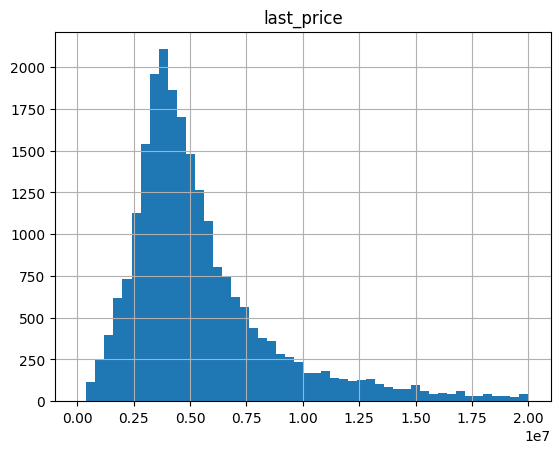

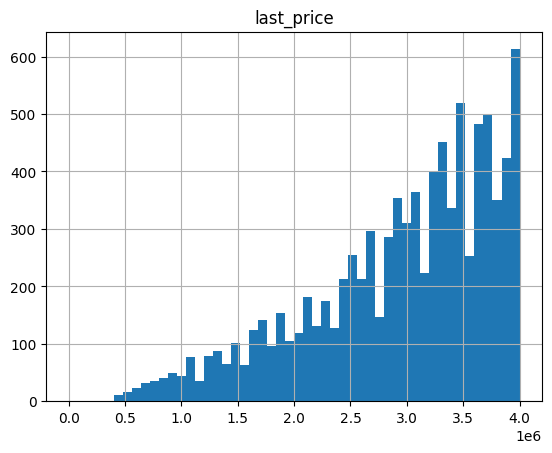

In [27]:
data.hist('last_price', bins=50, range=(0,2e+07));
data.hist('last_price', bins=50, range=(0,4e+06));

data.drop(index=data.query('last_price < 1e+05').index,inplace=True)

`total_area` - there are no apartments less than 10 sq.m., but there are less than 20.\
It doesn't look like an anomaly, unfortunately.\
Apartments with too large an area of ​​more than 500 sq.m. similar to luxury real estate, there are few of them and it is better to remove them.

Квартир площадью менее 10 кв.м.: 0
Квартир площадью более 500 кв.м.: 3


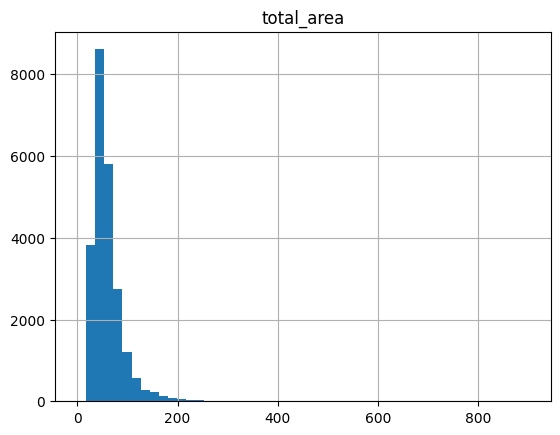

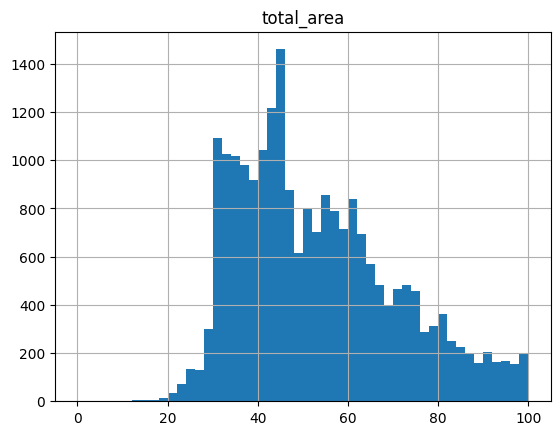

In [28]:
print('Квартир площадью менее 10 кв.м.:',data.query('total_area < 10')['total_area'].count()) 
print('Квартир площадью более 500 кв.м.:',data.query('total_area > 500')['total_area'].count())

data.drop(index=data.query('total_area > 500').index,inplace=True)

data.hist('total_area', bins=50, range=(0,900));
data.hist('total_area', bins=50, range=(0,100));

`rooms` - have null values, 195.\
Let's not hurry, let's check if it's studios, apartments or open plan?\
It looks like it is.\
Apartments without rooms are not apartments and are not open plan - 0.\
The maximum value is already 19 rooms, but this also happens.

In [29]:
print('Квартиры без комнат:',data.query('rooms == 0')['rooms'].count())

print('Квартиры без комнат и студии:',data.query('rooms == 0 and studio')['rooms'].count()) 

print('Квартиры без комнат и апартаменты:',data.query('rooms == 0 and is_apartment')['rooms'].count()) 

print('Квартиры без комнат и свободная планировка:',data.query('rooms == 0 and open_plan')['rooms'].count())

print('Квартиры без комнат не апартаменты и не свободная планировка:',data.query('rooms == 0 and ~open_plan and ~studio')['rooms'].count())

data.drop(index=data.query('rooms > 7').index,inplace=True)

Квартиры без комнат: 197
Квартиры без комнат и студии: 138
Квартиры без комнат и апартаменты: 0
Квартиры без комнат и свободная планировка: 59
Квартиры без комнат не апартаменты и не свободная планировка: 0


`ceiling height` - ceiling height.\
In residential buildings, it is installed taking into account the minimum requirements established by SNiP and a comfortable stay in it.
Regardless of the year of construction and the type of building, the height from floor to ceiling should be between 2.5-3.2 meters.\
Only a small number of super-expensive duplex penthouses with ceiling heights of 4-5m are known from real estate research.\
It can be assumed that apartments with a ceiling height of 25-36m are actually a typo and correspond to 2.5-3.6m
Based on this, we assume that all apartments with a ceiling height of 36m or more are emissions.\
Moreover, there is one value that indicates the height of the ceilings above 50m.

In [30]:
print('Квартир с потолками от 4 до 5м: ' + str(data.query('ceiling_height > 4 and ceiling_height <= 5')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 5 до 25м: ' + str(data.query('ceiling_height > 5 and ceiling_height < 25')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 25м до 36м: ' + str(data.query('ceiling_height >= 25 and ceiling_height <= 36')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 25м до 36м: ' + str(data.query('ceiling_height > 36 and ceiling_height < 50')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 50м: ' + str(data.query('ceiling_height >= 50')['ceiling_height'].count()) + ' шт.')

Квартир с потолками от 4 до 5м: 36 шт.
Квартир с потолками от 5 до 25м: 14 шт.
Квартир с потолками от 25м до 36м: 19 шт.
Квартир с потолками от 25м до 36м: 0 шт.
Квартир с потолками от 50м: 1 шт.


We remove apartments with ceiling heights from 4 to 25 meters.\
For apartments with ceiling heights up to 25 to 36 meters, we assume that this is a typo and divide by 10, getting 2.5 and 3.6 meters.\
We remove apartments with a ceiling height of 36 meters.

In [31]:
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)

data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)

data.drop(index=data.query('ceiling_height > 36').index,inplace=True)

We look at the height of the ceilings less than 2.5m more closely.

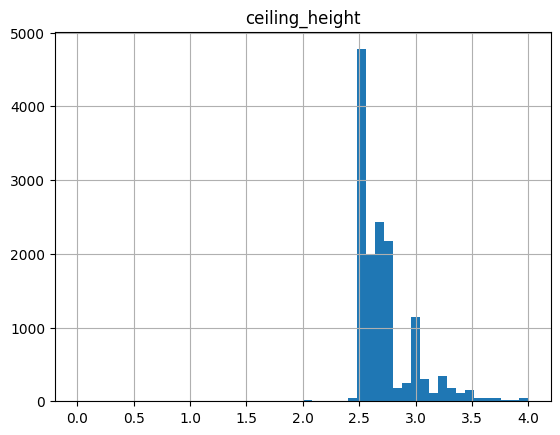

In [32]:
data.hist('ceiling_height',bins=50,range=(0,4));

We are not interested in apartments with a ceiling height of less than 2.5m, this is not according to SNiP. We remove from the selection.

In [33]:
print('Квартир с потолками меньше 2.5м : ' + str(data.query('ceiling_height < 2.5')['ceiling_height'].count()) + ' шт.')

data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)

Квартир с потолками меньше 2.5м : 73 шт.


`floors_total` - There are single floor apartments, but this doesn't look like an outlier. There is also a small number of apartments in 30 or more storey buildings.

Квартир в одноэтажных домах :  23
Квартир в 30+ этажных домах :  31


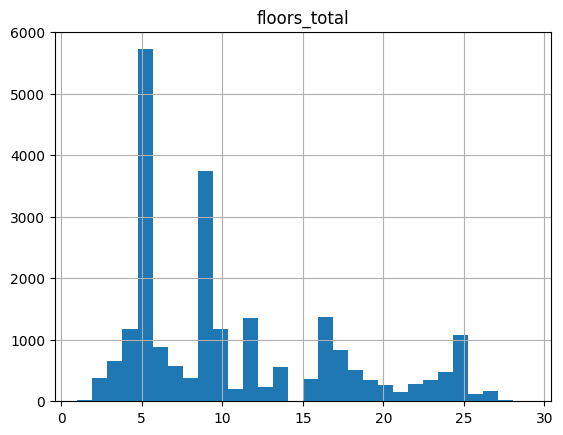

In [34]:
print('Квартир в одноэтажных домах : ',data.query('floors_total == 1')['floors_total'].count())
print('Квартир в 30+ этажных домах : ',data.query('floors_total > 30')['floors_total'].count())

data.drop(index=data.query('floors_total > 30').index,inplace=True)

data.hist('floors_total', bins=30);

`living_area` - We have a large number of apartments with a living area from 10 to 60 sq.m.\
Here, apartments with a living area of ​​less than 10 sq.m. there are 25 of them!\
Judging by the histogram, there is even a house with a living area of ​​2 sq.m.\
Well, this is just something strange, most likely a typo in the square or in the city, this can only be found in Hong Kong.\
Let's discard the values ​​with living area less than 10 sq.m.\
Let's discard apartments with an area of ​​more than 200 sq.m.

Жилая площадь меньше 10 кв.м.:  25
Жилая площадь больше общей:  0
Жилая площадь больше 200:  12


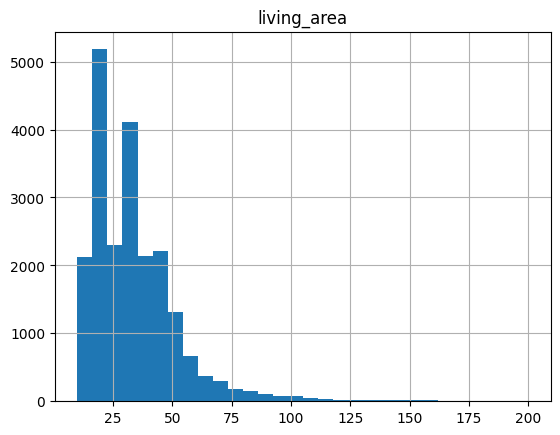

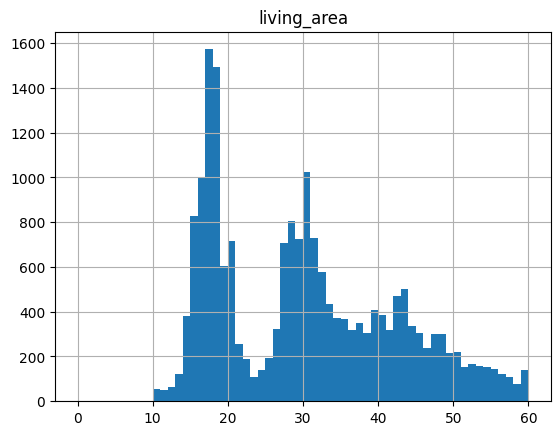

In [35]:
print('Жилая площадь меньше 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())
print('Жилая площадь больше общей: ',data.query('living_area > total_area')['living_area'].count())
print('Жилая площадь больше 200: ',data.query('living_area > 200')['living_area'].count())

data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

data.hist('living_area', bins=30);
data.hist('living_area', bins=60, range=(0,60));

`floor` - floor. There are no zero values ​​and no values ​​that are too large.\
I would like to immediately check whether there are floor values ​​greater than the number of storeys of the building.

Этаж 0 0
Этаж 0 0
Этаж больше количества этажей:  0


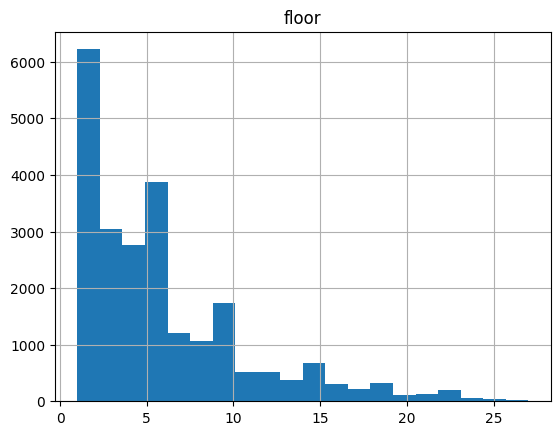

In [36]:
print('Этаж 0',data.query('floor == 0')['floor'].count())

print('Этаж 0',data.query('floor > 30')['floor'].count())

print('Этаж больше количества этажей: ',data.query('floor > floors_total')['floor'].count())

data.hist('floor',bins=20);

`kitchen_area` - kitchen area. There is one apartment with a kitchen area of ​​less than 1 sq. meters. Clearly an anomaly.
Many kitchens with an area of ​​5 sq.m.
Kitchens with an area of ​​more than 30 sq.m. quite a few.

Conclusion - we will remove the rows with kitchens less than 2 sq.m. and more than 50 sq.m.

Площадь кухни меньше 2 кв.м.:  1
Площадь кухни 5 кв.м.:  351
Площадь кухни больше 50 кв.м.:  33
Площадь кухни больше общей:  0


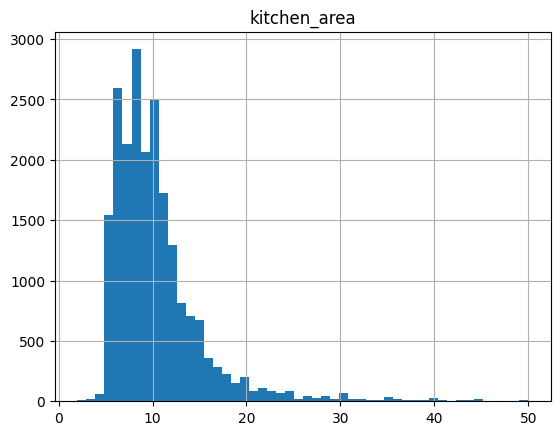

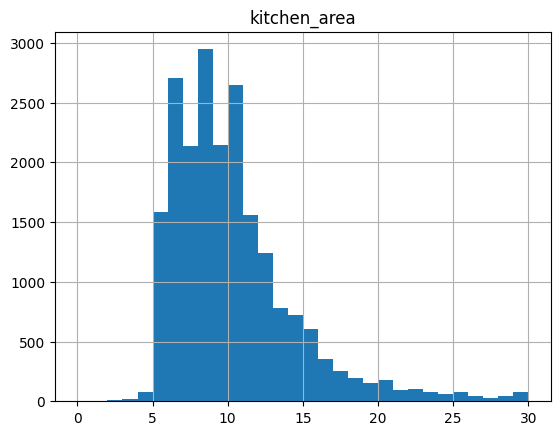

In [37]:
print('Площадь кухни меньше 2 кв.м.: ',data.query('kitchen_area < 2')['living_area'].count())
print('Площадь кухни 5 кв.м.: ',data.query('kitchen_area == 5')['living_area'].count())
print('Площадь кухни больше 50 кв.м.: ',data.query('kitchen_area > 50')['living_area'].count())
print('Площадь кухни больше общей: ',data.query('kitchen_area > total_area')['living_area'].count())

data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

data.hist('kitchen_area', bins=50);
data.hist('kitchen_area', bins=30, range=(0,30));

`balcony` - the number of balconies, everything looks good.

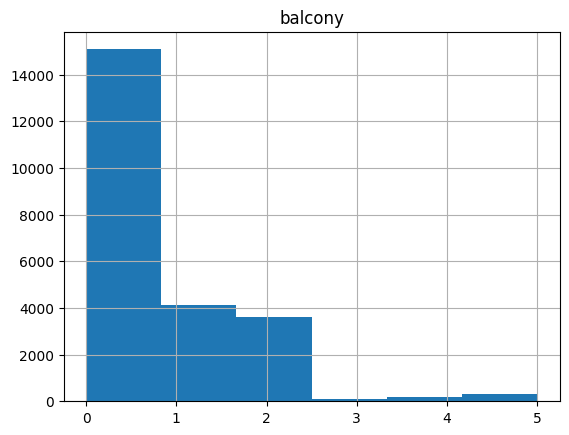

In [38]:
data.hist('balcony', bins=6);

`days_exposition` - how many days the ad was placed, we see that in general the schedule is normal. There are no null values.
Ads that have been hanging for more than 3 years will be discarded.

Объявление не было оопубликовано:  0
Объявлению больше 3 лет :  165


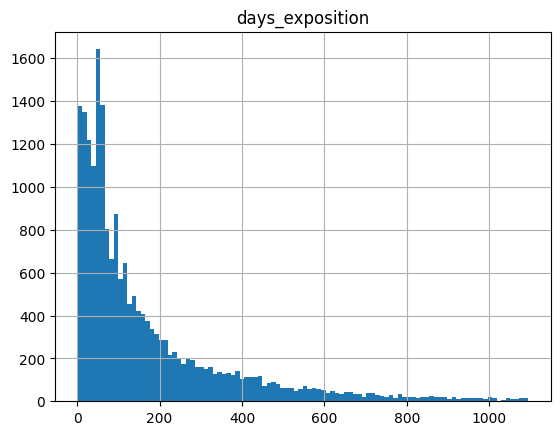

In [39]:
print('Объявление не было оопубликовано: ',data.query('days_exposition == 0')['days_exposition'].count())

print('Объявлению больше 3 лет : ',data.query('days_exposition > 365*3')['days_exposition'].count())

data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)

data.hist('days_exposition', bins=100);

This data is collected automatically. Histograms look good. One line is knocked out with airports_nearest. There is only one apartment closer than 5 km to the airport, it seems to be located at the airport. She must be removed. the rest of the data is normal.

- airports_nearest
- city_centers_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest

Квартир слишком близко к аэропорту: 1


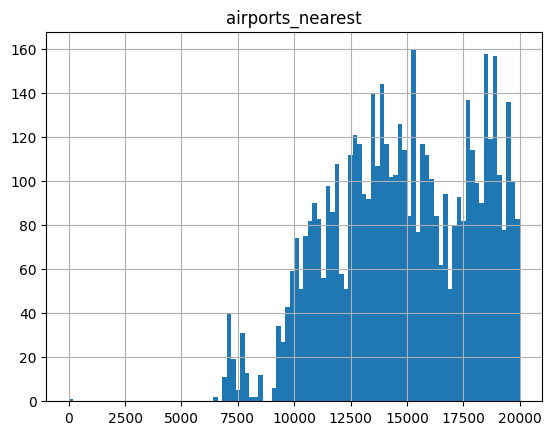

In [40]:
print('Квартир слишком близко к аэропорту:',data.query('airports_nearest < 5000')['airports_nearest'].count())
data.hist('airports_nearest', bins=100, range=(0,20000));

data.drop(index=data.query('airports_nearest < 5000').index,inplace=True)

Reset indexing after deleting rows.

In [41]:
data.reset_index(drop=True,inplace=True)

Indicators about the number of ads in the dataset, minimum and maximum indicators in the selected parameters for the sale of apartments, raw data.

In [42]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,238.00","23,238.00","14,148.00","20,105.00","23,238.00","21,368.00","21,001.00","23,238.00","23,154.00"
min,0.00,12.00,2.50,1.00,"430,000.00",10.00,2.00,1.00,1.00
max,7.00,494.10,4.00,"1,095.00","99,000,000.00",200.00,50.00,27.00,29.00


In [43]:
data.rooms.value_counts().to_frame()

,rooms
1,7957
2,7814
3,5702
4,1138
5,297
0,192
6,94
7,44


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23238 entries, 0 to 23237
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23238 non-null  int64         
 1   last_price            23238 non-null  int64         
 2   total_area            23238 non-null  float64       
 3   first_day_exposition  23238 non-null  datetime64[ns]
 4   rooms                 23238 non-null  int64         
 5   ceiling_height        14148 non-null  float64       
 6   floors_total          23154 non-null  Int8          
 7   living_area           21368 non-null  float64       
 8   floor                 23238 non-null  int64         
 9   is_apartment          20522 non-null  object        
 10  studio                23238 non-null  bool          
 11  open_plan             23238 non-null  bool          
 12  kitchen_area          21001 non-null  float64       
 13  balcony         

added code for `ceiling_height` to convert to fractional values ​​from 25 to 36.

Added and removed data according to the conditions:
- rooms > 7
- total_area > 500
- days_exposition > 365*3
- last_price > 100.000.000
- living_area > 200
- floors_total > 30

Removed Null for
- locality_name
- floors_total

I did not calculate the belonging to the city of st. petersburg of real estate by distance from the center.

### Count and add new columns to the table

#### price of one square meter ####

In [45]:
data['cost_per_sqm'] = data['last_price'] / data['total_area']

#### day of publication of the announcement (0 - Monday, 1 - Tuesday, etc.) ####

In [46]:
data['dayofweek'] = data['first_day_exposition'].dt.dayofweek

#### month of publication of the announcement ####

In [47]:
data['month'] = data['first_day_exposition'].dt.month

#### year of announcement publication ####

In [48]:
data['year'] = data['first_day_exposition'].dt.year

#### apartment floor type (values ​​- "first", "last", "other") ####

In [49]:
data['floor_category'] = data.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 'другой'), axis=1
)

data['floor_category_digit'] = data.apply(
    lambda x: 0 if (x.floor == 1) 
    else (2 if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 1), axis=1
)

In [50]:
data['floor_category_digit'].value_counts()

1    17126
2     3242
0     2870
Name: floor_category_digit, dtype: int64

#### distance in km to city center ####

In [51]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
try:
    data['city_centers_nearest_km'] =  data['city_centers_nearest_km'].astype('Int32')
    print('city_centers_nearest_km ok')
except:
    print('city_centers_nearest_km Int32 type conversion fail')

city_centers_nearest_km ok


### Conduct exploratory data analysis

#### Examining the parameters ####

In [52]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,dayofweek,month,year,floor_category_digit,city_centers_nearest_km
count,23238.000000,2.323800e+04,23238.000000,23238.000000,14148.000000,23154.0,21368.000000,23238.000000,21001.000000,23238.000000,...,7849.000000,17780.000000,8847.000000,20105.0,23238.000000,23238.000000,23238.000000,23238.000000,23238.000000,17779.0
mean,9.858077,6.108102e+06,59.074842,2.048369,2.718543,10.67673,33.755706,5.888200,10.369042,0.591660,...,490.441203,0.758774,521.744885,171.42855,98173.002968,2.572295,6.399604,2017.386608,1.016008,14.250183
std,5.674362,5.928683e+06,30.372824,1.020545,0.252213,6.53913,19.147684,4.864067,5.113107,0.958633,...,340.188883,0.929011,277.184448,197.24259,42202.335644,1.789668,3.487239,1.020104,0.512613,8.585534
min,0.000000,4.300000e+05,12.000000,0.000000,2.500000,1.0,10.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,13.000000,1.0,7962.962963,0.000000,1.000000,2014.000000,0.000000,0.0
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.0,18.600000,2.000000,7.000000,0.000000,...,288.000000,0.000000,299.000000,44.0,76473.945743,1.000000,3.000000,2017.000000,1.000000,9.0
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.0,30.000000,4.000000,9.000000,0.000000,...,455.000000,0.000000,506.000000,93.0,94789.198262,3.000000,6.000000,2017.000000,1.000000,13.0
75%,14.000000,6.700000e+06,69.000000,3.000000,2.800000,16.0,42.000000,8.000000,12.000000,1.000000,...,612.000000,1.000000,733.000000,224.0,113761.467890,4.000000,10.000000,2018.000000,1.000000,16.0
max,50.000000,9.900000e+07,494.100000,7.000000,4.000000,29.0,200.000000,27.000000,50.000000,5.000000,...,3190.000000,3.000000,1344.000000,1095.0,848484.848485,6.000000,12.000000,2019.000000,2.000000,66.0


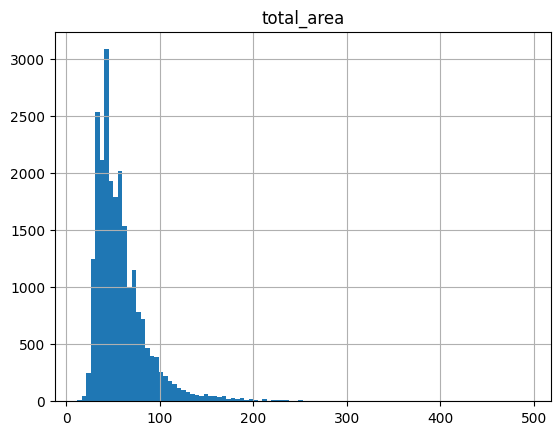

In [53]:
data.hist('total_area', bins=100);

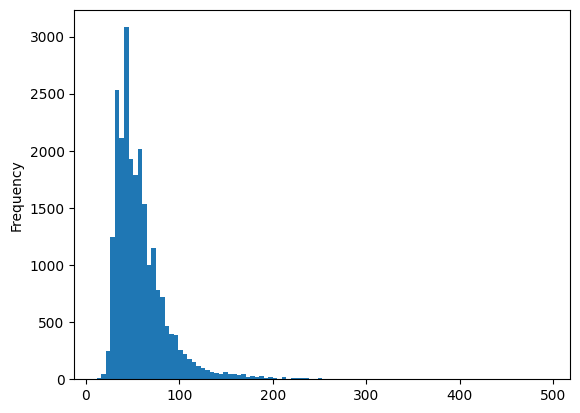

In [54]:
data['total_area'].plot(kind='hist', bins=100);

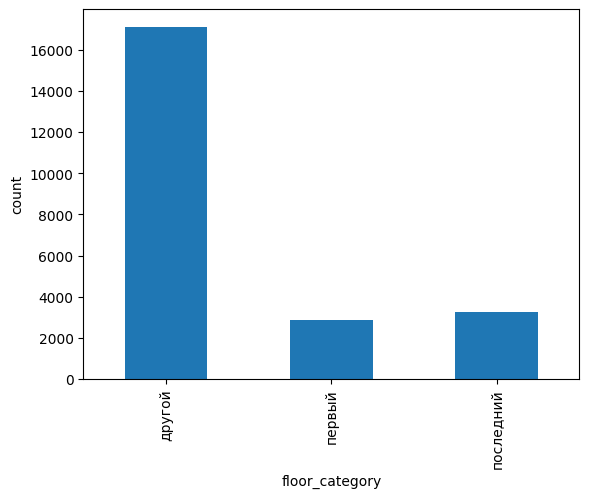

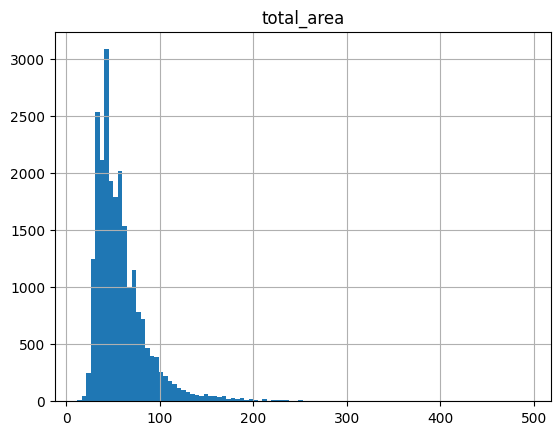

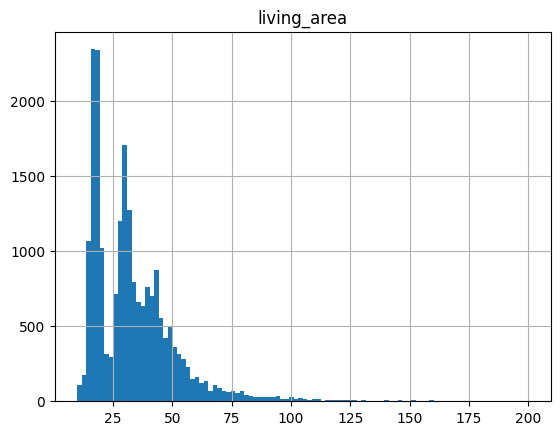

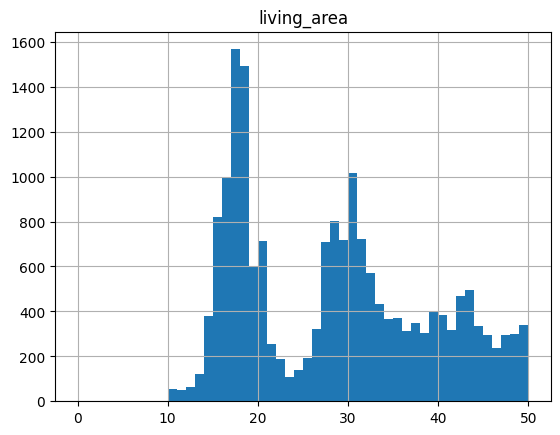

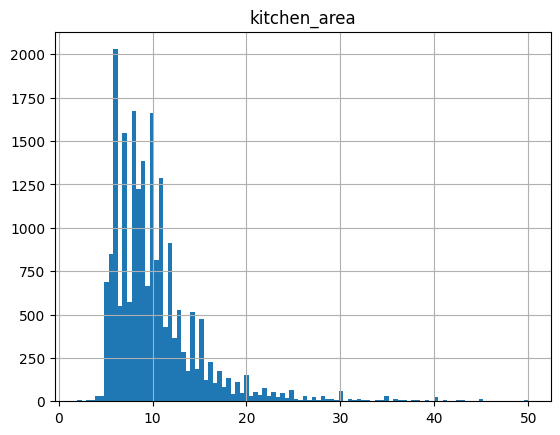

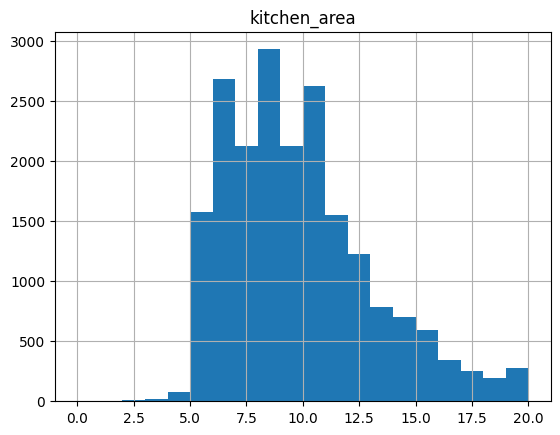

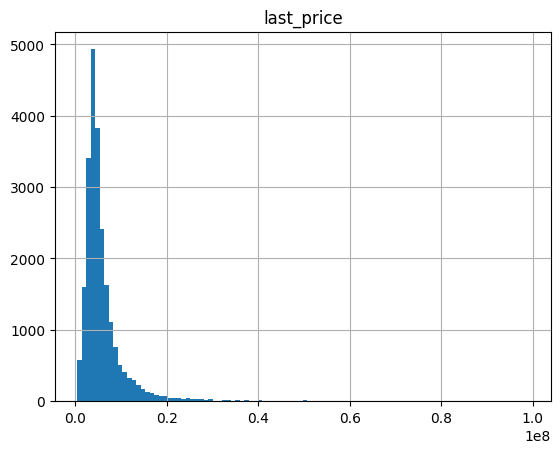

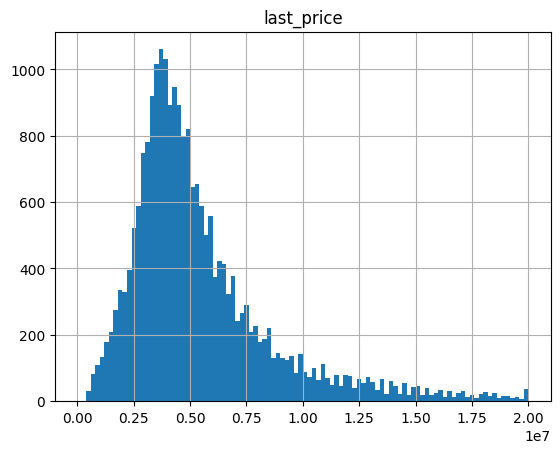

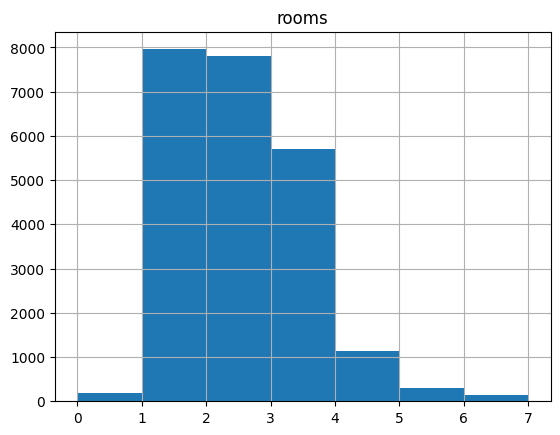

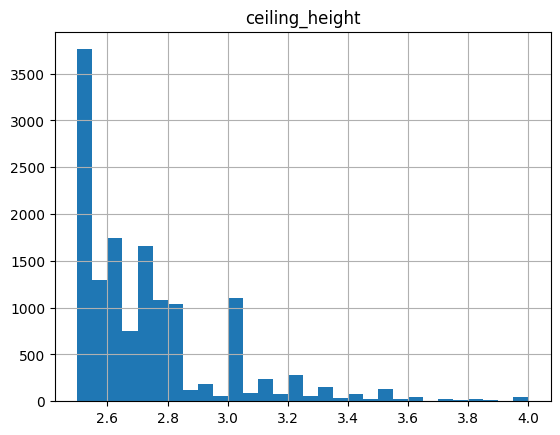

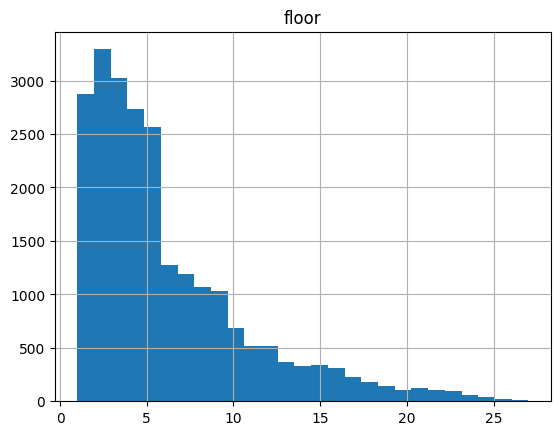

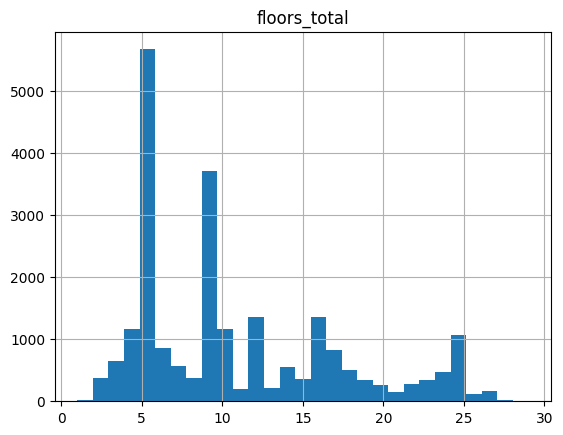

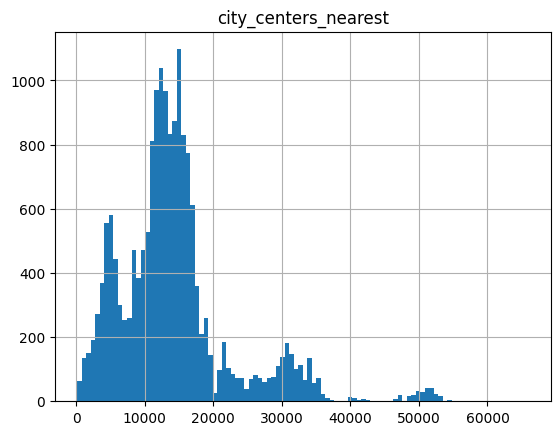

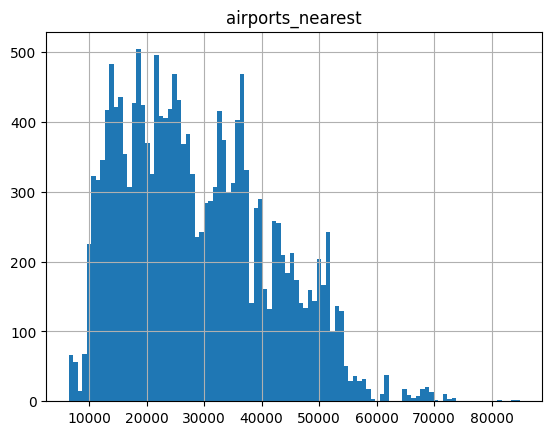

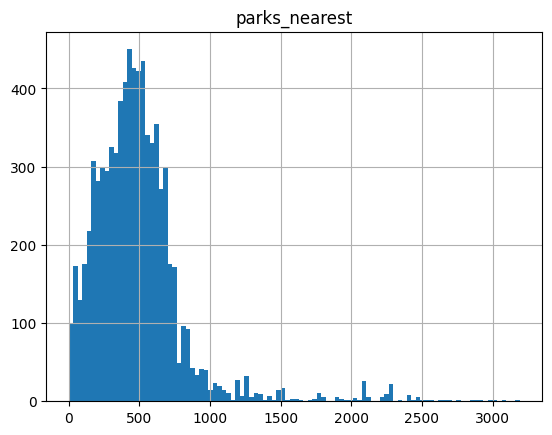

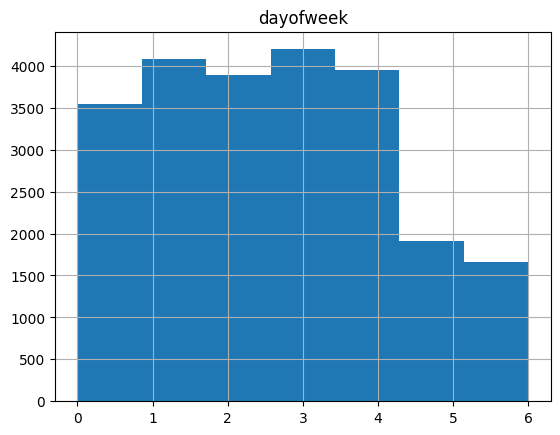

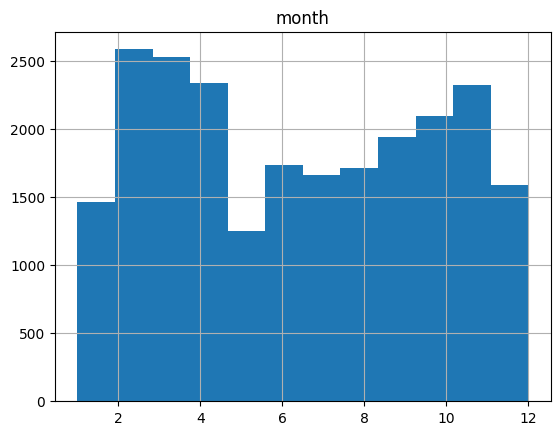

In [55]:
data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count');

data.hist('total_area', bins=100);

data.hist('living_area', bins=100);
data.hist('living_area', bins=50, range=(0,50));

data.hist('kitchen_area', bins=100);
data.hist('kitchen_area', bins=20, range=(0,20));

data.hist('last_price', bins=100);
data.hist('last_price', bins=100, range=(0,2e+07));

data.hist('rooms', bins=data['rooms'].max());

data.hist('ceiling_height', bins=30);

data.hist('floor', bins=data['floor'].max());

data.hist('floors_total', bins=data['floors_total'].max());

data.hist('city_centers_nearest', bins=100);

data.hist('airports_nearest', bins=100);

data.hist('parks_nearest', bins=100);

data.hist('dayofweek', bins=7);

data.hist('month', bins=12);

I started to study signatures through matplotlib, I will add them in future projects.

We built histograms for:
- floor type of the apartment ("first", "last", "other") in this case, use the type *bar*;\
Most apartments are on the "other" floor, and this is logical. The first and last floors are not the same.
- total area;\
We observe a very small number of apartments with a total area of ​​more than 100 sq.m. If you build a "box with a mustache" there will obviously be some values ​​that seem to be outliers, but this is just high-end real estate.
- living space;\
We observe two peaks - at 18 sq.m. and 30 sq.m. We need to check why we have exactly two peaks and why there is a clear dip of about 24 sq.m.
- kitchen area;
The kitchen area looks good.
- object price;\
The property's price looks good. A bit "noisy" schedule. A very long "tail" to the right - it looks like elite real estate.
- number of rooms;\
Most of all two- and three-room apartments, but there are rare exceptions.
- ceiling height;\
There are two peaks 2.5m and 3m, which is logical.
- floor of the apartment;
Most apartments are from the 1st to the 5th floor. Logino, St. Petersburg is not a city of skyscrapers
- total number of floors in the house;
We see clear peaks: 5-story buildings, 9-story buildings, and small peaks of taller new buildings.
- distance to the city center in meters;
Here we observe two peaks, one small, 5 km and the other large from 10 km. up to 15 km. There are also very small bursts at 30 km. and 50 km.
- distance to the nearest airport;
Here we see a rather "noisy" graph. But this is quite normal.
- distance to the nearest park;
Judging by the schedule, most apartments with parks are at a distance of up to 750m.
- day and month of publication of the announcement.\
We see a failure in the publication of ads on Saturday and Sunday, which is logical. We also see that increased activity was observed from February to April. There was also a gradual increase in activity from July to November. Dips in December, January and May.

Let's plot values ​​for a column with ceiling heights

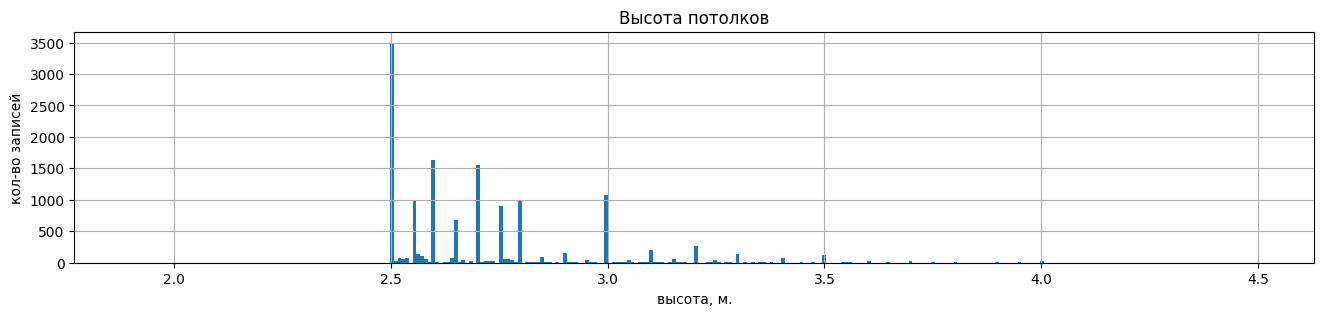

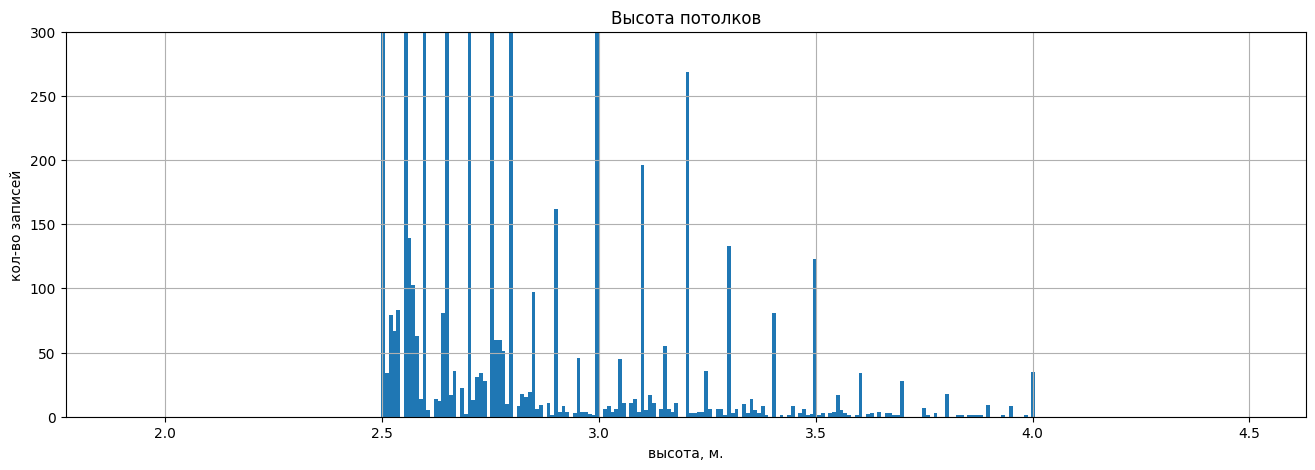

In [56]:
import matplotlib.pyplot as plt

(
    data['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', 
              bins=300, range=(1.9,4.5), grid=True, title='Высота потолков', figsize=(16,3))        
        .set( ylabel = 'кол-во записей', xlabel = 'высота, м.')
)
plt.show()
(
    data['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', 
              bins=300, range=(1.9,4.5), grid=True, title='Высота потолков', figsize=(16,5))
        .set(ylim = (0, 300), ylabel = 'кол-во записей', xlabel = 'высота, м.')
        
)
plt.show()

#### Studying days_exposition -/ how fast apartments sold ####

Среднее время продажи квартиры в днях: 171
Медианное время продажи квартиры в днях: 93

[Выбросы] Количество объявлений, которые сняты через:
45 дней: 870
60 дней: 535
90 дней: 202


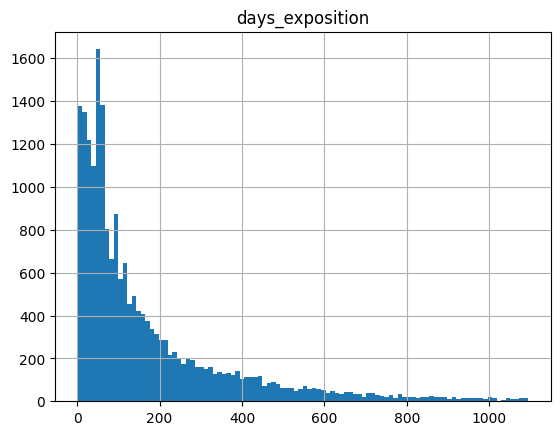

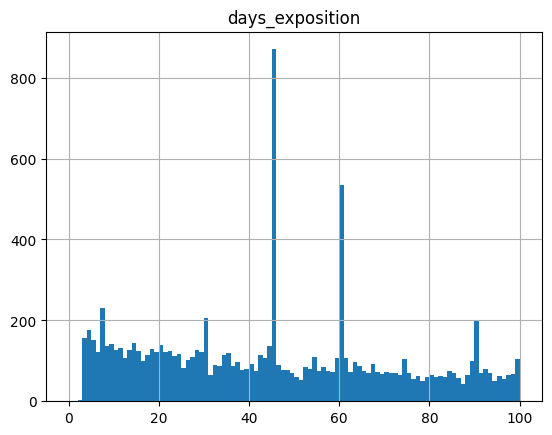

In [57]:
data.hist('days_exposition', bins=100);
data.hist('days_exposition', bins=100, range = (0,100));
print(f'Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median()))

print('\n[Выбросы] Количество объявлений, которые сняты через:')
print('45 дней:',data[data['days_exposition']==45]['days_exposition'].count())
print('60 дней:',data[data['days_exposition']==60]['days_exposition'].count())
print('90 дней:',data[data['days_exposition']==90]['days_exposition'].count())

We can say that the average time to sell an apartment is 181 days or half a year. But if we take the median, then it is already 95 days, two times less. Why is that? Because we have a "long tail" of apartments that have been on sale for a very long time, literally for years.\
I would suggest fast selling up to 95 days and unusually long selling over 181 days.
Outliers are similar to expired paid ads or a system to remove inactive ads.

#### Factors that most affect the total (full) cost of the object ####

In [58]:
list_for_graph = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'floor_category_digit',
                  'dayofweek',
                  'month',
                  'year']

for entry in list_for_graph:
    correlation = data['last_price'].corr(data[entry])
    print(f'Корреляция между last_price и {entry} составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 75.51%
Корреляция между last_price и living_area составляет: 66.55%
Корреляция между last_price и kitchen_area составляет: 56.00%
Корреляция между last_price и rooms составляет: 45.80%
Корреляция между last_price и floor_category_digit составляет: 5.71%
Корреляция между last_price и dayofweek составляет: -0.09%
Корреляция между last_price и month составляет: 0.65%
Корреляция между last_price и year составляет: -3.92%


**Here I decided to "check" the data from super-expensive apartments because they have a very strong effect on correlations...**

Created charts based on recommendations

<AxesSubplot: xlabel='last_price', ylabel='kitchen_area'>

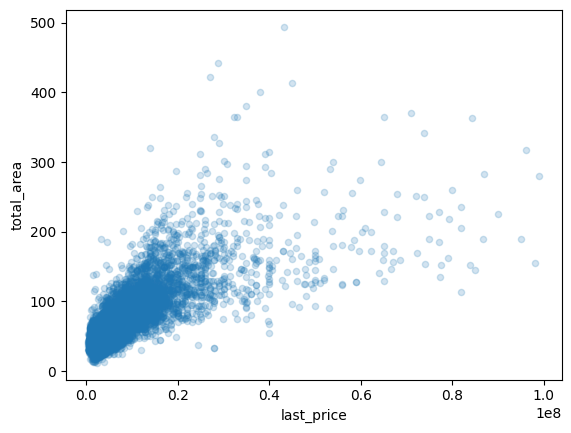

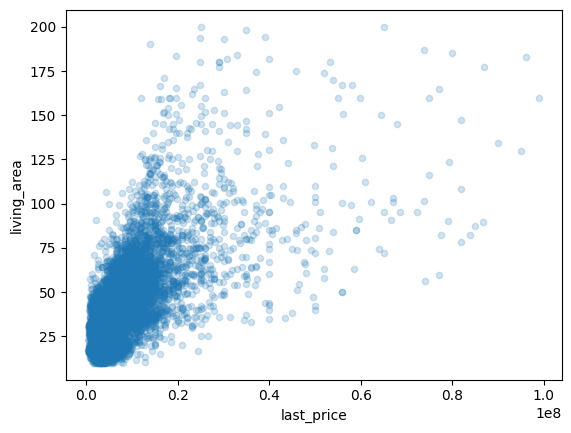

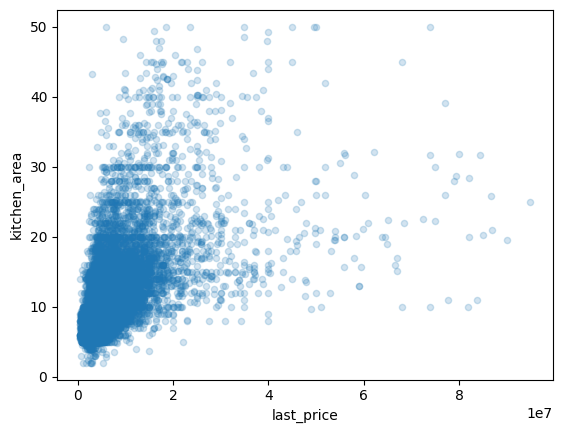

In [59]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2)

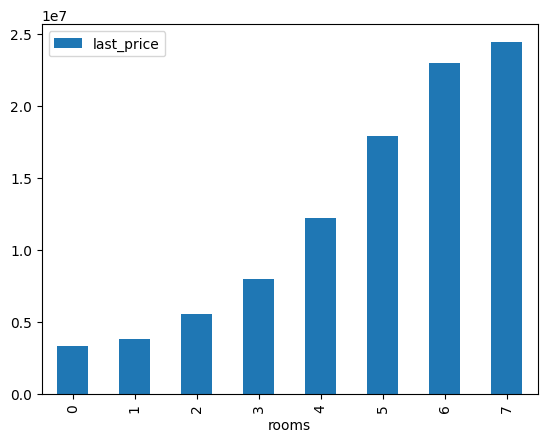

In [60]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar');

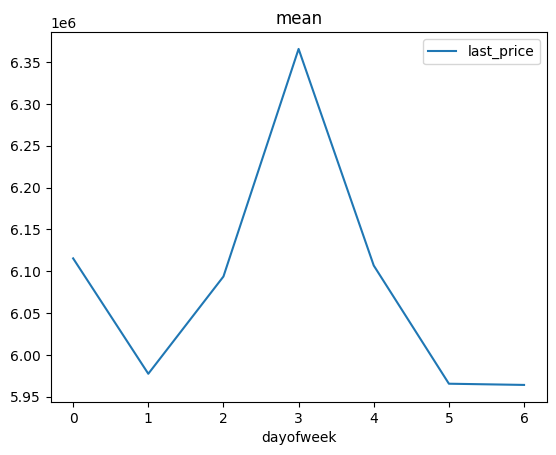

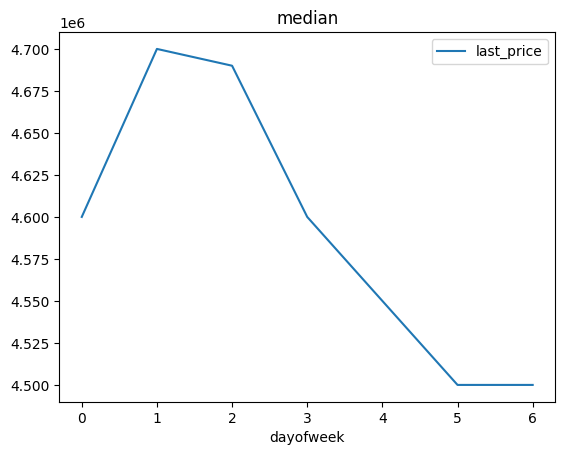

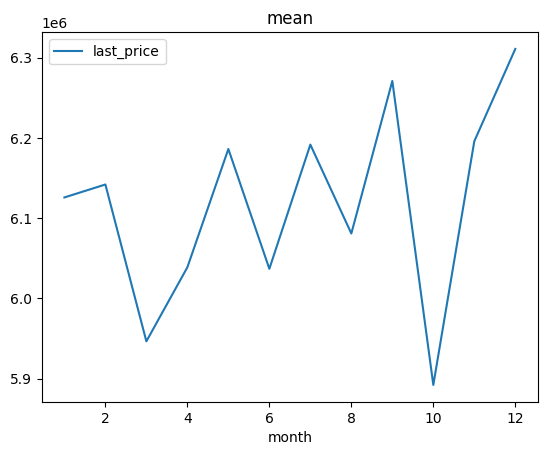

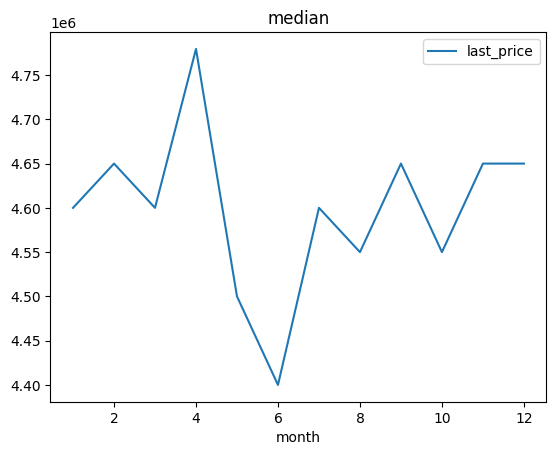

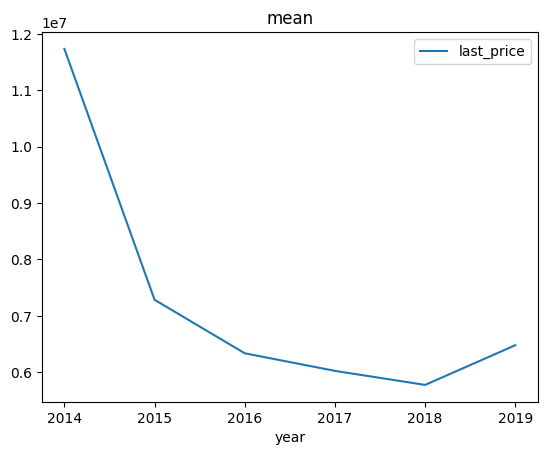

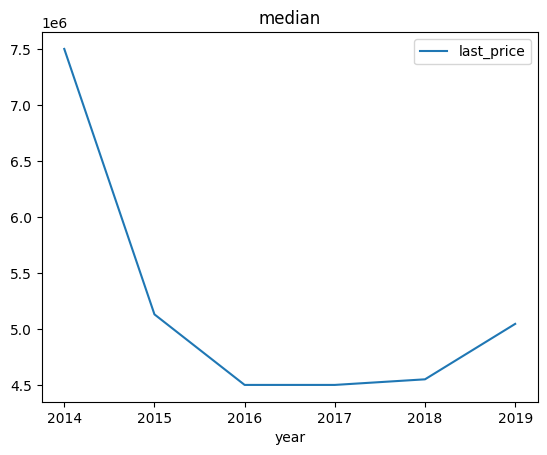

In [61]:
data.pivot_table(index='dayofweek',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='dayofweek',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='month',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

Descending price depends on:
- total area;
- living area;
- kitchen area;
- the number of rooms.

The price practically depends on:
- the floor on which the apartment is located;
- dates of placement.


<AxesSubplot: xlabel='last_price', ylabel='floor_category'>

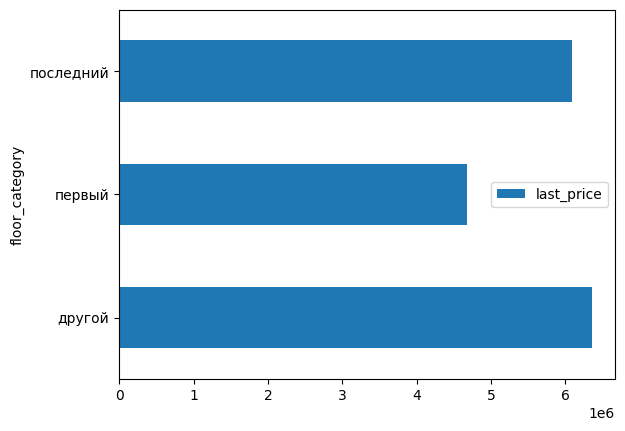

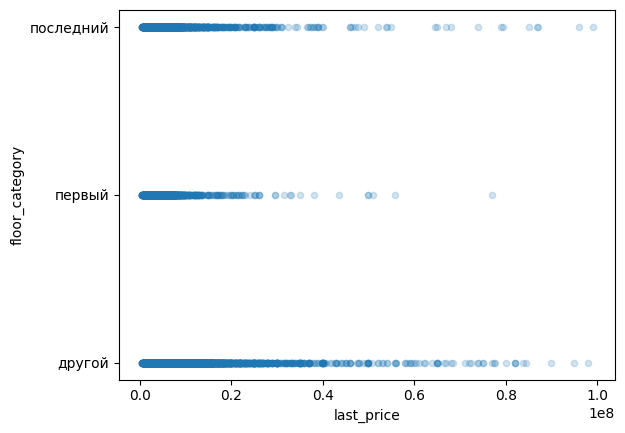

In [62]:
data.pivot_table(index='floor_category',values='last_price').plot(y='last_price', kind='barh');

data.plot(x='last_price', y='floor_category', kind='scatter', alpha=0.2)

#### Average price of one square meter in the top 10 settlements ####

<AxesSubplot: ylabel='locality_name'>

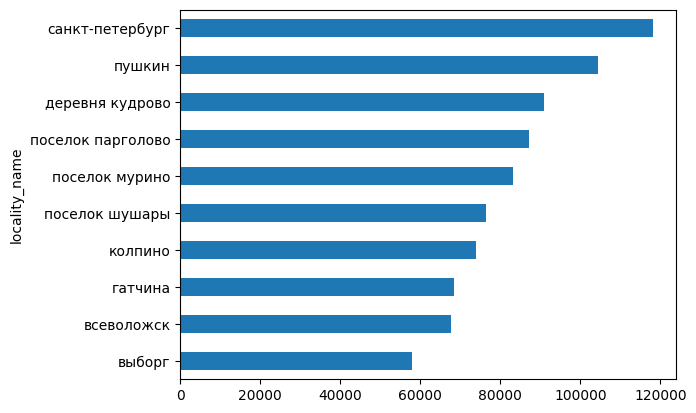

In [63]:
top_10 = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10.pop('total_area_count')
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10]
top_10['price_per_sq_m'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by=['price_per_sq_m'],ascending=True, inplace=True)
top_10['price_per_sq_m'].plot(kind='barh')

In [64]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,dayofweek,month,year,floor_category,floor_category_digit,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,<NA>,120370.370370,3,3,2019,другой,1,16
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0,19
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2.0,574.0,558,92785.714286,3,8,2015,другой,1,14
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,3.0,234.0,424,408176.100629,4,7,2015,другой,1,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121,100000.000000,1,6,2018,другой,1,8


In [65]:
data['rooms'].value_counts()

1    7957
2    7814
3    5702
4    1138
5     297
0     192
6      94
7      44
Name: rooms, dtype: int64

In [66]:
data.groupby(by='rooms')['rooms'].count().sort_values(ascending=False)

rooms
1    7957
2    7814
3    5702
4    1138
5     297
0     192
6      94
7      44
Name: rooms, dtype: int64

Expectedly the most expensive real estate in St. Petersburg.\
The TOP-10 includes the cities closest to St. Petersburg.

#### Distance to city center ####

<AxesSubplot: xlabel='city_centers_nearest_km'>

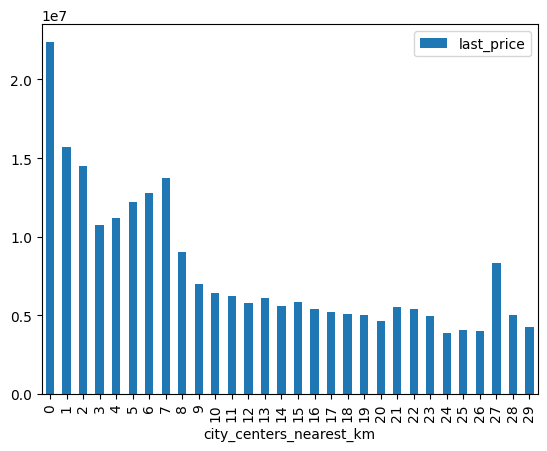

In [67]:
(
    data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar')
)

By a wide margin, real estate up to 1 km is in the lead.\
We see lower real estate prices at a distance of 1 km. up to 7 km. inclusive.\
Further, the price drops at a distance of 8 km. up to 27 km.\
We see a peak at 27 km, it is difficult to explain it, perhaps this is real estate in a "special" area.

### General conclusion

After examining the data, we can say that it is possible to work with tables in which there are missing values.
It is still better to clean the data from obvious "outliers", but it is possible that you will have to clean the data after the exploratory data analysis stage.
In our example, these are expensive apartments that spoiled the correlations and graphs of the dependence of the total cost on various parameters.
Of the unusual features:
- 27 km from the center of St. Petersburg there is real estate at a price almost equal to real estate in 8 km. from the center;
- The TOP-10 includes mainly the cities closest to St. Petersburg and the largest cities in the region:
    - Pushkin;
    - Gatchina;
    - Vsevolozhsk;
    - Vyborg.
- The price mainly depends on the area of the apartment, but the correlation with the number of storeys (not the first and not the last) is visible on the graph.\
There are obviously more of these apartments and they are obviously more expensive.
- Fast sales are up to 95 days, and unusually long sales are over 181 days.\
- **Blowouts** The number of ads that are taken down through:
    - 45 days: 872
    - 60 days: 536
    - 90 days: 204\

I assume that the data is taken from a site where inactive ads are automatically removed if the user does not extend the placement time after a certain period. Or there is paid accommodation. You need to contact the person who provides the data.
